# tyMPC_Python

In [ ]:
!pip install pyomo

In [ ]:
!apt-get install -y -qq coinor-cbc
!apt-get install -y -qq coinor-libipopt-dev

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get


In [ ]:
from pyomo.environ import SolverFactory
print(SolverFactory('ipopt').available())
print(SolverFactory('cbc').available())

True
True


In [ ]:
# Import necessary packages
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# 'Forecasted' weather input

In [ ]:
import pandas as pd
from IPython.display import display

# Load the CSV file into a pandas DataFrame
dni_df = pd.read_csv('dni.csv')
dhi_df = pd.read_csv('dhi.csv')

display(dni_df)

,date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2021-07-01,-0.0,-0.0,-0.0,-0.0,-0.0,0.001372,0.096210,0.583342,6.784263,...,22.785292,5.844901,8.089723,4.277959,1.482835,0.168308,-0.0,-0.0,-0.0,-0.0
1,2021-07-02,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.136459,0.280450,0.691927,...,5.114238,2.218888,1.841005,1.187089,0.883235,0.216870,-0.0,-0.0,-0.0,-0.0
2,2021-07-03,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.123221,0.705333,1.169050,...,9.325278,85.291621,6.858742,2.387318,1.091714,0.091161,-0.0,-0.0,-0.0,-0.0
3,2021-07-04,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.046312,0.282296,0.200595,...,4.324988,32.837027,15.489245,20.807576,7.109412,1.272496,-0.0,-0.0,-0.0,-0.0
4,2021-07-05,-0.0,-0.0,-0.0,-0.0,-0.0,0.001510,0.712443,4.595682,34.377072,...,587.412846,406.125535,152.044838,33.020830,9.531702,1.753844,-0.0,-0.0,-0.0,-0.0
5,2021-07-06,-0.0,-0.0,-0.0,-0.0,-0.0,0.001554,1.305265,4.676202,15.649847,...,9.580146,87.292844,32.837418,36.604852,9.878081,1.551366,-0.0,-0.0,-0.0,-0.0
6,2021-07-07,-0.0,-0.0,-0.0,-0.0,-0.0,0.001601,1.097874,7.293942,37.621802,...,10.954305,5.448455,28.463131,10.551529,4.775113,1.000104,-0.0,-0.0,-0.0,-0.0
7,2021-07-08,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.009845,0.509321,0.406342,...,3.158516,3.337661,6.211240,2.273239,1.030838,0.411554,-0.0,-0.0,-0.0,-0.0
8,2021-07-09,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.248075,0.799022,2.566066,...,181.925012,7.724570,15.128040,3.756102,3.453451,1.256065,-0.0,-0.0,-0.0,-0.0
9,2021-07-10,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.102444,2.599603,14.054894,...,285.925866,392.950134,177.693261,38.462774,10.102872,1.677768,-0.0,-0.0,-0.0,-0.0


In [ ]:
#display(dni_df)
sliced_14_dni_df = dni_df[:14]
print("\n Sliced Dataframe 7x24:")
display(sliced_14_dni_df)
transpose_sliced_dni_df = sliced_14_dni_df.transpose()
display(transpose_sliced_dni_df)


 Sliced Dataframe 7x24:


,date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2021-07-01,-0.0,-0.0,-0.0,-0.0,-0.0,0.001372,0.096210,0.583342,6.784263,...,22.785292,5.844901,8.089723,4.277959,1.482835,0.168308,-0.0,-0.0,-0.0,-0.0
1,2021-07-02,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.136459,0.280450,0.691927,...,5.114238,2.218888,1.841005,1.187089,0.883235,0.216870,-0.0,-0.0,-0.0,-0.0
2,2021-07-03,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.123221,0.705333,1.169050,...,9.325278,85.291621,6.858742,2.387318,1.091714,0.091161,-0.0,-0.0,-0.0,-0.0
3,2021-07-04,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.046312,0.282296,0.200595,...,4.324988,32.837027,15.489245,20.807576,7.109412,1.272496,-0.0,-0.0,-0.0,-0.0
4,2021-07-05,-0.0,-0.0,-0.0,-0.0,-0.0,0.001510,0.712443,4.595682,34.377072,...,587.412846,406.125535,152.044838,33.020830,9.531702,1.753844,-0.0,-0.0,-0.0,-0.0
5,2021-07-06,-0.0,-0.0,-0.0,-0.0,-0.0,0.001554,1.305265,4.676202,15.649847,...,9.580146,87.292844,32.837418,36.604852,9.878081,1.551366,-0.0,-0.0,-0.0,-0.0
6,2021-07-07,-0.0,-0.0,-0.0,-0.0,-0.0,0.001601,1.097874,7.293942,37.621802,...,10.954305,5.448455,28.463131,10.551529,4.775113,1.000104,-0.0,-0.0,-0.0,-0.0
7,2021-07-08,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.009845,0.509321,0.406342,...,3.158516,3.337661,6.211240,2.273239,1.030838,0.411554,-0.0,-0.0,-0.0,-0.0
8,2021-07-09,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.248075,0.799022,2.566066,...,181.925012,7.724570,15.128040,3.756102,3.453451,1.256065,-0.0,-0.0,-0.0,-0.0
9,2021-07-10,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.102444,2.599603,14.054894,...,285.925866,392.950134,177.693261,38.462774,10.102872,1.677768,-0.0,-0.0,-0.0,-0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
date,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,0.001372,0.0,0.0,0.0,0.00151,0.001554,0.001601,0.0,0.0,0.0,0.001847,0.0,0.0,0.0
6,0.09621,0.136459,0.123221,0.046312,0.712443,1.305265,1.097874,0.009845,0.248075,0.102444,0.78131,0.010178,0.033276,0.033589
7,0.583342,0.28045,0.705333,0.282296,4.595682,4.676202,7.293942,0.509321,0.799022,2.599603,3.959333,0.244828,0.24594,0.23234
8,6.784263,0.691927,1.16905,0.200595,34.377072,15.649847,37.621802,0.406342,2.566066,14.054894,35.905984,0.606903,0.589147,2.06364


In [ ]:
#display(dhi_df)
sliced_14_dhi_df = dhi_df[:14]
print("\n Sliced Dataframe 7x24:")
#print(sliced_14_dhi_df)
reshaped_dhi_df = pd.DataFrame(sliced_14_dhi_df.values.reshape(1, -1))
reshaped_dhi_df = reshaped_dhi_df.iloc[0,1:].values
#print(reshaped_dhi_df.shape)
checkShape = np.transpose(reshaped_dhi_df)
print(checkShape.shape)
print(np.transpose(reshaped_dhi_df))
# transpose_sliced_dhi_df = sliced_14_dhi_df.transpose()
# display(transpose_sliced_dhi_df)


 Sliced Dataframe 7x24:
(349,)
[0.0 0.0 0.0 0.0 0.0 1.162910950102414 18.585203226217995
 60.235209076927575 240.3028995164594 197.4015478298171 436.135432474364
 463.7993249077333 454.1644809592552 462.3145169159053 384.98926423730535
 256.04383233872716 272.8703807999927 172.446377304316 80.97365550182882
 17.42496377304316 0.0 0.0 0.0 0.0 '2021-07-02' 0.0 0.0 0.0 0.0 0.0 0.0
 22.064852986971474 41.752591332728606 77.52125500973666
 109.68132467428676 115.40950102414044 69.45942036869057 87.87364779154353
 240.3028995164594 254.9206376429481 158.79813375037307 131.42470753097294
 91.32123958916604 62.54233049863935 19.74526457959766 0.0 0.0 0.0 0.0
 '2021-07-03' 0.0 0.0 0.0 0.0 0.0 0.0 20.905147833182152 66.00167688274323
 100.5069813251719 146.2647142018361 163.3503978650768 186.06897448775425
 173.58257328514264 158.79813375037307 323.38294769142146
 448.8781801687542 251.5499849568398 129.13895808468178 69.45942036869057
 12.782224962392098 0.0 0.0 0.0 0.0 '2021-07-04' 0.0 0.0 0.

In [ ]:
#display(dhi_df)
sliced_14_dhi_df = dhi_df[:14]
sliced_14_dhi_df = sliced_14_dhi_df.iloc[:, 1:]
#print(sliced_14_dhi_df.shape)

#print("\n Sliced Dataframe 14x24:")
#print(sliced_14_dhi_df)
reshaped_dhi_df = pd.DataFrame(sliced_14_dhi_df.values.reshape(1, -1))
reshaped_dhi_df = reshaped_dhi_df.iloc[:].values
reshaped_dhi_df = reshaped_dhi_df.astype(int)

print(reshaped_dhi_df)
#print(reshaped_dhi_df.shape)

# checkShape = np.transpose(reshaped_dhi_df)
# print(checkShape.shape)
# print(np.transpose(reshaped_dhi_df))
# transpose_sliced_dhi_df = sliced_14_dhi_df.transpose()
# display(transpose_sliced_dhi_df)

[[  0   0   0   0   0   1  18  60 240 197 436 463 454 462 384 256 272 172
   80  17   0   0   0   0   0   0   0   0   0   0  22  41  77 109 115  69
   87 240 254 158 131  91  62  19   0   0   0   0   0   0   0   0   0   0
   20  66 100 146 163 186 173 158 323 448 251 129  69  12   0   0   0   0
    0   0   0   0   0   0  12  41  41 130 131 227 405 414 234 399 338 338
  175  47   0   0   0   0   0   0   0   0   0   1  49 166 384 464 416 329
  364 280 337 424 461 369 203  55   0   0   0   0   0   0   0   0   0   1
   67 167 331 465 457 409 449 454 325 449 387 376 206  52   0   0   0   0
    0   0   0   0   0   1  61 208 390 463 421 335 417 424 335 247 378 268
  143  41   0   0   0   0   0   0   0   0   0   0   5  55  59  57 131 215
  194 457 200 194 239 125  67  26   0   0   0   0   0   0   0   0   0   0
   29  69 147 462 240 273 456 456 465 293 335 161 122  46   0   0   0   0
    0   0   0   0   0   0  18 124 322 460 465 440 414 420 446 429 464 378
  207  53   0   0   0   0   0   0   0 

In [ ]:
#display(dni_df)
sliced_14_dni_df = dni_df[:14]
sliced_14_dni_df = sliced_14_dni_df.iloc[:, 1:]
#print(sliced_14_dni_df.shape)

#print("\n Sliced Dataframe 14x24:")
#print(sliced_14_dni_df)
reshaped_dni_df = pd.DataFrame(sliced_14_dni_df.values.reshape(1, -1))
reshaped_dni_df = reshaped_dni_df.iloc[:].values
reshaped_dni_df = reshaped_dni_df.astype(int)

print(reshaped_dni_df)
#print(reshaped_dni_df.shape)

# checkShape = np.transpose(reshaped_dni_df)
# print(checkShape.shape)
# print(np.transpose(reshaped_dni_df))
# transpose_sliced_dhi_df = sliced_7_dni_df.transpose()
# display(transpose_sliced_dni_df)

[[  0   0   0   0   0   0   0   0   6   3 333 186 232 106  22   5   8   4
    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0
    0   4   5   2   1   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   1   2   2   2   1   9  85   6   2   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   1   3  29  35   4  32  15  20
    7   1   0   0   0   0   0   0   0   0   0   0   0   4  34 154 396 576
  479 674 587 406 152  33   9   1   0   0   0   0   0   0   0   0   0   0
    1   4  15 166 248 383  70  82   9  87  32  36   9   1   0   0   0   0
    0   0   0   0   0   0   1   7  37 143 383 564 350  42  10   5  28  10
    4   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   3
    2  88   3   3   6   2   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   2 136   4   5  85 227 181   7  15   3   3   1   0   0   0   0
    0   0   0   0   0   0   0   2  14 126 183 292 359 348 285 392 177  38
   10   1   0   0   0   0   0   0   0 

In [ ]:
# Define parameters
DLI_target_min = 30.0  # Minimum target daily light integral in mol/m²/day
DLI_target_max = 50.0  # Maximum target daily light integral in mol/m²/day

# Solar radiation data (New York in summer) for 24 hours
DNI = np.array([0, 0, 0, 0, 0, 0, 0, 6, 3, 333, 186, 232, 106, 22, 5, 8, 4, 1, 0, 0, 0, 0, 0, 0 ])  # W/m²
DHI = np.array([ 0, 0, 0, 0, 1, 18, 60, 240, 197, 436, 463, 454, 462, 384, 256, 272, 172, 80, 17, 0, 0, 0, 0, 0 ])  # W/m²
alpha = np.array([350.86, 5.92, 20.6, 34.12, 46.2, 56.95, 66.7, 75.94, 85.25, 95.45, 108.02, 126.06, 155.48, 196.12, 228.73, 248.67, 262.09, 272.65, 282.07, 291.26, 300.87, 311.36, 323.12, 336.34]) / 180 * np.pi
theta_e = np.array([-23.71, -24.02, -21.47, -16.37, -9.23, 0.01, 9.29, 19.71, 30.6, 41.64, 52.46, 62.33, 69.43, 70.28, 64.23, 54.74, 44.05, 33.02, 22.07, 11.52, 1.83, -7.43, -14.94, -20.53]) / 180 * np.pi

# Repeat each array 14 times
DNI_repeated = reshaped_dni_df
DHI_repeated = reshaped_dhi_df
alpha_repeated = np.tile(alpha, 14)
theta_e_repeated = np.tile(theta_e, 14)


# Define optimal_angle for each time step using the given formula
optimal_angle = [(np.pi / 2 * np.sin(alpha[t]) / np.abs(np.sin(alpha[t])) -
                  np.arctan(np.sin(theta_e[t]) / (np.cos(theta_e[t]) * np.sin(alpha[t]))))
                 for t in range(24)]

optimal_angle_repeated = np.tile(optimal_angle, 14) #repeat

# Define power generation expression for each hour
W_p = 2
L_p = 20
eta = 0.2  # energy conversion Efficiency
power_price = 0.2
RS_p = 6 #pitch distance
delta_theta = 20

In [ ]:
alpha_repeated #see shape

array([6.12366221, 0.10332349, 0.35953783, 0.59550634, 0.80634211,
       0.99396501, 1.16413461, 1.32540303, 1.48789319, 1.66591677,
       1.88530466, 2.20016206, 2.71363792, 3.42293973, 3.9920916 ,
       4.34011025, 4.57433344, 4.75864021, 4.92305022, 5.08344598,
       5.25117212, 5.43425716, 5.63950788, 5.87024041, 6.12366221,
       0.10332349, 0.35953783, 0.59550634, 0.80634211, 0.99396501,
       1.16413461, 1.32540303, 1.48789319, 1.66591677, 1.88530466,
       2.20016206, 2.71363792, 3.42293973, 3.9920916 , 4.34011025,
       4.57433344, 4.75864021, 4.92305022, 5.08344598, 5.25117212,
       5.43425716, 5.63950788, 5.87024041, 6.12366221, 0.10332349,
       0.35953783, 0.59550634, 0.80634211, 0.99396501, 1.16413461,
       1.32540303, 1.48789319, 1.66591677, 1.88530466, 2.20016206,
       2.71363792, 3.42293973, 3.9920916 , 4.34011025, 4.57433344,
       4.75864021, 4.92305022, 5.08344598, 5.25117212, 5.43425716,
       5.63950788, 5.87024041, 6.12366221, 0.10332349, 0.35953

In [ ]:
DHI_repeated #consistent array, add 0

array([[  0,   0,   0,   0,   0,   1,  18,  60, 240, 197, 436, 463, 454,
        462, 384, 256, 272, 172,  80,  17,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22,  41,  77, 109, 115,  69,  87, 240, 254,
        158, 131,  91,  62,  19,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  20,  66, 100, 146, 163, 186, 173, 158, 323, 448, 251,
        129,  69,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         12,  41,  41, 130, 131, 227, 405, 414, 234, 399, 338, 338, 175,
         47,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  49, 166,
        384, 464, 416, 329, 364, 280, 337, 424, 461, 369, 203,  55,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,  67, 167, 331, 465,
        457, 409, 449, 454, 325, 449, 387, 376, 206,  52,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,  61, 208, 390, 463, 421, 335,
        417, 424, 335, 247, 378, 268, 143,  41,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   5,  55,  59,  57

In [ ]:
DHI_repeated[0]

array([  0,   0,   0,   0,   0,   1,  18,  60, 240, 197, 436, 463, 454,
       462, 384, 256, 272, 172,  80,  17,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  22,  41,  77, 109, 115,  69,  87, 240, 254,
       158, 131,  91,  62,  19,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  20,  66, 100, 146, 163, 186, 173, 158, 323, 448, 251,
       129,  69,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        12,  41,  41, 130, 131, 227, 405, 414, 234, 399, 338, 338, 175,
        47,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  49, 166,
       384, 464, 416, 329, 364, 280, 337, 424, 461, 369, 203,  55,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,  67, 167, 331, 465,
       457, 409, 449, 454, 325, 449, 387, 376, 206,  52,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,  61, 208, 390, 463, 421, 335,
       417, 424, 335, 247, 378, 268, 143,  41,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   5,  55,  59,  57, 131, 215, 19

In [ ]:
DNI_repeated[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   6,   3, 333, 186, 232,
       106,  22,   5,   8,   4,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   4,   5,
         2,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   1,   2,   2,   2,   1,   9,  85,   6,
         2,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   1,   3,  29,  35,   4,  32,  15,  20,   7,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,
        34, 154, 396, 576, 479, 674, 587, 406, 152,  33,   9,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,  15, 166,
       248, 383,  70,  82,   9,  87,  32,  36,   9,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   7,  37, 143, 383, 564,
       350,  42,  10,   5,  28,  10,   4,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   

In [ ]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# # data input
# data = [0, 0, 0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 0, 0, 0, 0, 0, 0, 0]
# #[0, 0, 0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 0, 0, 0, 0, 0, 0, 0]
# #[0, 0, 0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 0, 0, 0, 0, 0, 0, 0]

# end = 95
# result = []
# for i in range(end):
#   # original 24 to predict to next 24, similar shape
#   X = []  # charateristics
#   y = []  # target
#   window_size = 24  # 24 in 24 out per loop

#   # create sample data, input&output pairs
#   for i in range(len(data) - window_size * 2 + 1):
#       X.append(data[i:i+window_size])
#       y.append(data[i+window_size:i+window_size*2])

#   X = np.array(X)
#   y = np.array(y)

#   # train/test
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#   # linear regression
#   model = LinearRegression()
#   model.fit(X_train, y_train)

#   # prediction
#   predictions = model.predict(X_test)
#   result.append(predictions)

#   # results
#   print("actual:", y_test)
#   print("predicted:", predictions)

# 'Forecasted' weather input ends

# Actual weather test ver
during the application, the actual weather should be real-time weather input

In [ ]:
# Define parameters
DLI_target_min = 30.0  # Minimum target daily light integral in mol/m²/day
DLI_target_max = 50.0  # Maximum target daily light integral in mol/m²/day

# Solar radiation data (New York in summer) for 24 hours
DNI = np.array([0, 0, 0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 0, 0, 0, 0, 0, 0, 0])  # W/m²
DHI = np.array([0, 0, 0, 0, 0, 55, 131, 205, 154, 319, 433, 434, 265, 343, 314, 167, 234, 38, 16, 1, 0, 0, 0, 0])  # W/m²
alpha = np.array([350.86, 5.92, 20.6, 34.12, 46.2, 56.95, 66.7, 75.94, 85.25, 95.45, 108.02, 126.06, 155.48, 196.12, 228.73, 248.67, 262.09, 272.65, 282.07, 291.26, 300.87, 311.36, 323.12, 336.34]) / 180 * np.pi
theta_e = np.array([-23.71, -24.02, -21.47, -16.37, -9.23, 0.01, 9.29, 19.71, 30.6, 41.64, 52.46, 62.33, 69.43, 70.28, 64.23, 54.74, 44.05, 33.02, 22.07, 11.52, 1.83, -7.43, -14.94, -20.53]) / 180 * np.pi

# Repeat each array 7 times
DNI_R = np.tile(DNI, 14)
print(DNI_repeated.shape)
DHI_R = np.tile(DHI, 14)

alpha_repeated = np.tile(alpha, 14)
theta_e_repeated = np.tile(theta_e, 14)



# Define optimal_angle for each time step using the given formula
optimal_angle = [(np.pi / 2 * np.sin(alpha[t]) / np.abs(np.sin(alpha[t])) -
                  np.arctan(np.sin(theta_e[t]) / (np.cos(theta_e[t]) * np.sin(alpha[t]))))
                 for t in range(24)]

optimal_angle_repeated = np.tile(optimal_angle, 14) #repeat

# Define power generation expression for each hour
W_p = 2
L_p = 20
eta = 0.2  # energy conversion Efficiency #module & inverter efficiency  parameter
power_price = 0.2
RS_p = 6 #pitch distance
delta_theta = 20

(1, 336)


In [ ]:
# DNI_expanded = np.tile(DNI, 14)
# DHI_expanded = np.tile(DHI, 14)
alpha_expanded = np.tile(alpha, 14)
theta_e_expanded = np.tile(theta_e, 14)
optimal_angle_expanded = np.tile(optimal_angle, 14)

# print(DNI_expanded.shape)
# print(DHI_expanded.shape)
print(alpha_expanded.shape)
print(theta_e_expanded.shape)
print(optimal_angle_expanded.shape)
print(alpha_expanded)

(336,)
(336,)
(336,)
[6.12366221 0.10332349 0.35953783 0.59550634 0.80634211 0.99396501
 1.16413461 1.32540303 1.48789319 1.66591677 1.88530466 2.20016206
 2.71363792 3.42293973 3.9920916  4.34011025 4.57433344 4.75864021
 4.92305022 5.08344598 5.25117212 5.43425716 5.63950788 5.87024041
 6.12366221 0.10332349 0.35953783 0.59550634 0.80634211 0.99396501
 1.16413461 1.32540303 1.48789319 1.66591677 1.88530466 2.20016206
 2.71363792 3.42293973 3.9920916  4.34011025 4.57433344 4.75864021
 4.92305022 5.08344598 5.25117212 5.43425716 5.63950788 5.87024041
 6.12366221 0.10332349 0.35953783 0.59550634 0.80634211 0.99396501
 1.16413461 1.32540303 1.48789319 1.66591677 1.88530466 2.20016206
 2.71363792 3.42293973 3.9920916  4.34011025 4.57433344 4.75864021
 4.92305022 5.08344598 5.25117212 5.43425716 5.63950788 5.87024041
 6.12366221 0.10332349 0.35953783 0.59550634 0.80634211 0.99396501
 1.16413461 1.32540303 1.48789319 1.66591677 1.88530466 2.20016206
 2.71363792 3.42293973 3.9920916  4.34011

In [ ]:
DHI =DHI_repeated[0]
DNI =DNI_repeated[0]

# actual weather input ends

# 7-day sliding window with deficit
gives day 1-7, 2-8, 3-9 until N(the length of growing season)

with 1-7 gives predicted_day1, 2-8 gives predicted_day2 etc.

In [ ]:
# len(applied_angles)

# Deterministic Model Predictive Control (MPC)

# Deficit
1-7 2-8 3-9 4-10 5-11 6-12 7-13 8-14

14-day forecasted inputs will give 8-day outputs   

output_length = (N - control_interval + 1) where N is the input_length

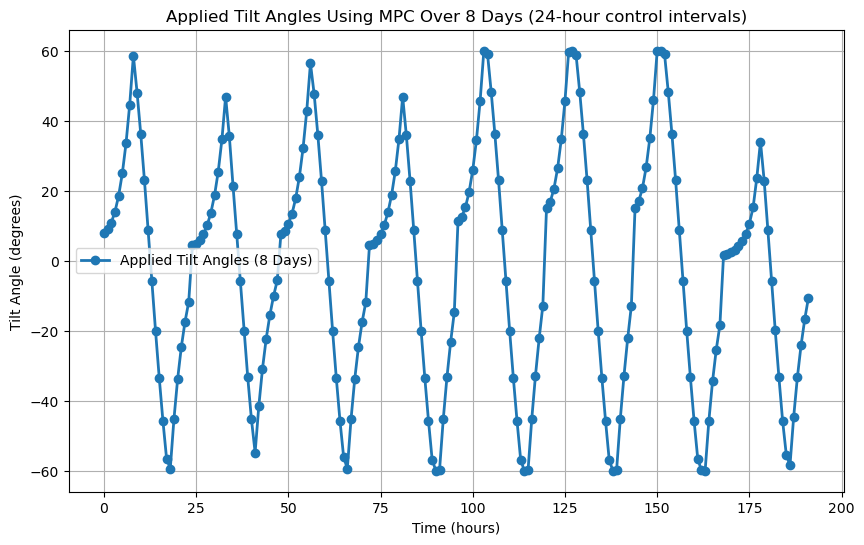

192


In [ ]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

deficit = 0.0 # DLI


def mpc_control_7days(initial_theta, DNI, DHI, theta_e, optimal_angle, alpha, DNI_R, DHI_R, control_interval=7, interval_R=24, N=95):


    control_interval=control_interval*24
    N = N * 24 #!defineN=95 days= entire growing season
    deficit_out = []
    deficit_out_2 = []

    # List to store applied tilt angles for each control interval
    applied_tilt_angles = []

    # Initialize the current tilt angle to the initial value
    current_theta = initial_theta

    deficit = 0.0
    moving_average_time_period = 7*24 # days
    # Loop over the number of time steps for MPC (sliding horizon)
    for t in range(0,N - control_interval + 1):
        #
        # Slice data for the prediction horizon
        DNI_horizon = DNI[t:t + control_interval] #control interval=between each loop=7*24 7DAYS
        DHI_horizon = DHI[t:t + control_interval]
        theta_e_horizon = theta_e[t:t + control_interval]
        optimal_angle_horizon = optimal_angle[t:t + control_interval]

        DNI_horizon_R = DNI_R[t:t + control_interval] #control interval=between each loop=7*24 7DAYS
        DHI_horizon_R = DHI_R[t:t + control_interval]

        #print(DNI_horizon.shape)
        #print(DHI_horizon.shape)
        #print(theta_e_horizon.shape)
        #print(optimal_angle_horizon.shape)

        # Ensure the horizon size is not exceeding the data range
        #if len(DNI_horizon) < control_interval:
            #break

        # Create Pyomo model
        model = ConcreteModel()

        # Decision variable: tilt angle θ, bounded between -60 and 60 degrees (converted to radians)
        model.θ = Var(range(control_interval), bounds=(-60 / 180 * np.pi, 60 / 180 * np.pi), initialize=current_theta)

        # Shadow length variable
        model.shadow_length = Var(range(control_interval), within=NonNegativeReals)

        # Constraints for shadow length
        model.shadow_constraints = ConstraintList()

        for i in range(control_interval):
            model.shadow_constraints.add(model.shadow_length[i] >= cos(model.θ[i] - optimal_angle_horizon[i]) * W_p)
            model.shadow_constraints.add(model.shadow_length[i] >= -cos(model.θ[i] - optimal_angle_horizon[i]) * W_p)
        #model.shadow_constraints.add(model.shadow_length[t] >= cos(model.θ[t] - optimal_angle_horizon[t]) * W_p)
        #model.shadow_constraints.add(model.shadow_length[t] >= -cos(model.θ[t] - optimal_angle_horizon[t]) * W_p)

        # DLI expression
        def radavg_expr(model, i):
            return (RS_p * (sin(theta_e_horizon[i]) * DNI_horizon[i] + DHI_horizon[i]) - model.shadow_length[i] * DNI_horizon[i]) / RS_p

        model.radavg = Expression(range(control_interval), rule=radavg_expr)


        actual_dli = sum((RS_p * (sin(theta_e_horizon[i]) * DNI_horizon_R[i] + DHI_horizon_R[i]) - model.shadow_length[i] * DNI_horizon_R[i]) / RS_p * 0.5 * 4.6 * 24 * 3600 / 1e6 for i in range(interval_R))
        #set up variable  =24

        DLI_target = DLI_target_min + deficit
        deficit = (DLI_target - actual_dli) / moving_average_time_period
        deficit_daily_avg = deficit *24

        deficit_out.append(deficit_daily_avg)
        #deficit_out_2.append(deficit) *24



        # DLI constraint
        model.DLI_constraint = Constraint(expr=sum(model.radavg[i] * 0.5 * 4.6 * 24 * 3600 / 1e6 for i in range(control_interval)) / control_interval >= (DLI_target_min + deficit))

        # AOI expression
        def aoi_expr(model, i):
            return cos(model.θ[i]) * sin(theta_e_horizon[i]) + sin(model.θ[i]) * cos(theta_e_horizon[i]) * cos(alpha[i] - np.pi / 2)

        model.aoi = Expression(range(control_interval), rule=aoi_expr)

        # Power generation expression
        def power_generation_expr(model, i):
            return W_p * L_p * eta * (model.aoi[i] * DNI_horizon[i] + DHI_horizon[i])

        model.power_generation = Expression(range(control_interval), rule=power_generation_expr)

        # Objective function: maximize power generation
        def objective_rule(model):
            return sum(model.power_generation[i] for i in range(control_interval)) / 1e6 * power_price

        model.objective = Objective(rule=objective_rule, sense=maximize)

        # Constraints for limiting rate of change of tilt angle
        model.angle_change_constraints = ConstraintList()
        '''
        if t < N:
            model.angle_change_constraints.add(model.θ[t + 1] - model.θ[t] <= delta_theta / 180 * np.pi )
            model.angle_change_constraints.add(model.θ[t + 1] - model.θ[t] >= -delta_theta / 180 * np.pi )
        '''
        for i in range(control_interval - 1):
          model.angle_change_constraints.add(model.θ[i + 1] - model.θ[i] <= delta_theta / 180 * np.pi)
          model.angle_change_constraints.add(model.θ[i + 1] - model.θ[i] >= -delta_theta / 180 * np.pi)

        # Solve the optimization problem using Ipopt
        solver = SolverFactory('ipopt')
        solver.solve(model, tee=False)

        # Apply the control action for the control interval (e.g., 24 hours)
        #for i in range(24):
            #applied_tilt_angles.append(value(model.θ[i]) * 180 / np.pi)

        applied_tilt_angles.append(value(model.θ[0]) * 180 / np.pi)  # Convert from radians to degrees

        # Update current tilt angle to be used for the next iteration
        current_theta = value(model.θ[control_interval-1])  # The last control interval's angle becomes the new current angle
        #print(len(applied_tilt_angles))
    return applied_tilt_angles


applied_angles = mpc_control_7days(0, DNI_repeated[0], DHI_repeated[0], theta_e_expanded, optimal_angle_expanded, alpha_expanded, DNI_R, DHI_R, control_interval=7, interval_R=24, N=14)

# Plot the applied tilt angles
plt.figure(figsize=(10, 6))
plt.plot(range(len(applied_angles)), applied_angles, label="Applied Tilt Angles (8 Days)", lw=2, marker='o')
plt.xlabel("Time (hours)")
plt.ylabel("Tilt Angle (degrees)")
plt.title("Applied Tilt Angles Using MPC Over 8 Days (24-hour control intervals)")
plt.grid(True)
plt.legend()
plt.show()

print(len(applied_angles))

(30.0 - (0.0*shadow_length[0] + 0.0*shadow_length[1] + 0.0*shadow_length[2] + 0.0*shadow_length[3] + 0.0*shadow_length[4] + (330.0376991116517 - 36*shadow_length[5])/6*0.5*4.6*24*3600/1000000.0 + (870.2672846701819 - 87*shadow_length[6])/6*0.5*4.6*24*3600/1000000.0 + (1778.3840622771702 - 271*shadow_length[7])/6*0.5*4.6*24*3600/1000000.0 + (2967.2922428219904 - 669*shadow_length[8])/6*0.5*4.6*24*3600/1000000.0 + (3556.5157337732553 - 412*shadow_length[9])/6*0.5*4.6*24*3600/1000000.0 + (3668.4530043070476 - 225*shadow_length[10])/6*0.5*4.6*24*3600/1000000.0 + (2965.339853201388 - 68*shadow_length[11])/6*0.5*4.6*24*3600/1000000.0 + (1663.02700323936 - 13*shadow_length[12])/6*0.5*4.6*24*3600/1000000.0 + (2204.8510397661394 - 26*shadow_length[13])/6*0.5*4.6*24*3600/1000000.0 + (2029.8885385807002 - 27*shadow_length[14])/6*0.5*4.6*24*3600/1000000.0 + (1011.7984897426289 - 2*shadow_length[15])/6*0.5*4.6*24*3600/1000000.0 + (2225.827872656163 - 197*shadow_length[16])/6*0.5*4.6*24*3600/1000000

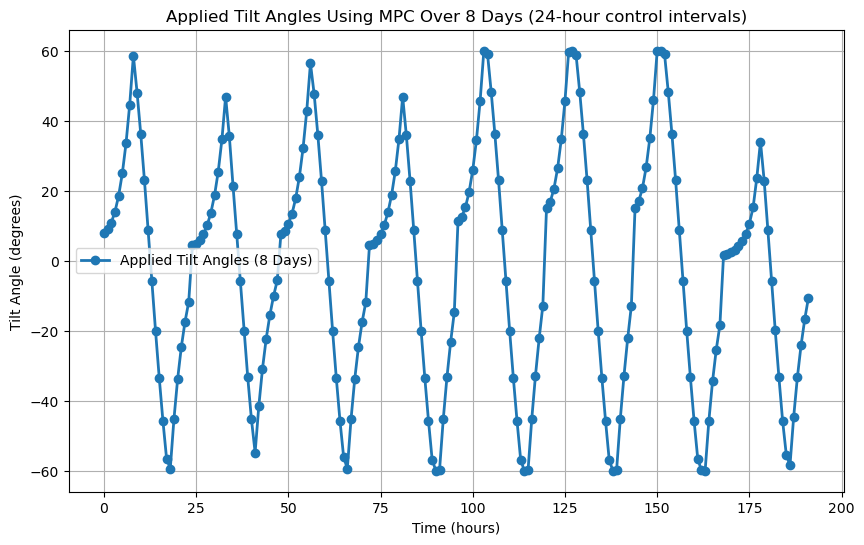

192


In [ ]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

deficit = 0.0 # DLI


def mpc_control_7days(initial_theta, DNI, DHI, theta_e, optimal_angle, alpha, DNI_R, DHI_R, control_interval=7, N=95):
    control_interval=control_interval*24
    N = N * 24 #!defineN=95 days= entire growing season
    deficit_out = []
    deficit_out_2 = []

    # List to store applied tilt angles for each control interval
    applied_tilt_angles = []

    # Initialize the current tilt angle to the initial value
    current_theta = initial_theta

    deficit = 0.0
    moving_average_time_period = 7*24 # days
    # Loop over the number of time steps for MPC (sliding horizon)
    for t in range(0,N - control_interval + 1,24):
        # Slice data for the prediction horizon
        DNI_horizon = DNI[t:t + control_interval] #control interval=between each loop=7*24 7DAYS
        DHI_horizon = DHI[t:t + control_interval]
        theta_e_horizon = theta_e[t:t + control_interval]
        optimal_angle_horizon = optimal_angle[t:t + control_interval]

        DNI_horizon_R = DNI_R[t:t + control_interval] #control interval=between each loop=7*24 7DAYS
        DHI_horizon_R = DHI_R[t:t + control_interval]

        #print(DNI_horizon.shape)
        #print(DHI_horizon.shape)
        #print(theta_e_horizon.shape)
        #print(optimal_angle_horizon.shape)

        # Ensure the horizon size is not exceeding the data range
        #if len(DNI_horizon) < control_interval:
            #break

        # Create Pyomo model
        model = ConcreteModel()

        # Decision variable: tilt angle θ, bounded between -60 and 60 degrees (converted to radians)
        model.θ = Var(range(control_interval), bounds=(-60 / 180 * np.pi, 60 / 180 * np.pi), initialize=current_theta)

        # Shadow length variable
        model.shadow_length = Var(range(control_interval), within=NonNegativeReals)

        # Constraints for shadow length
        model.shadow_constraints = ConstraintList()

        for i in range(control_interval):
            model.shadow_constraints.add(model.shadow_length[i] >= cos(model.θ[i] - optimal_angle_horizon[i]) * W_p)
            model.shadow_constraints.add(model.shadow_length[i] >= -cos(model.θ[i] - optimal_angle_horizon[i]) * W_p)
        #model.shadow_constraints.add(model.shadow_length[t] >= cos(model.θ[t] - optimal_angle_horizon[t]) * W_p)
        #model.shadow_constraints.add(model.shadow_length[t] >= -cos(model.θ[t] - optimal_angle_horizon[t]) * W_p)

        # DLI expression
        def radavg_expr(model, i):
            return (RS_p * (sin(theta_e_horizon[i]) * DNI_horizon[i] + DHI_horizon[i]) - model.shadow_length[i] * DNI_horizon[i]) / RS_p

        model.radavg = Expression(range(control_interval), rule=radavg_expr)


        actual_dli = sum((RS_p * (sin(theta_e_horizon[i]) * DNI_horizon_R[i] + DHI_horizon_R[i]) - model.shadow_length[i] * DNI_horizon_R[i]) / RS_p * 0.5 * 4.6 * 24 * 3600 / 1e6 for i in range(control_interval))


        DLI_target = DLI_target_min + deficit
        deficit = (DLI_target - actual_dli) / moving_average_time_period
        deficit_daily_avg = deficit *24

        deficit_out.append(deficit_daily_avg)
        print(deficit_daily_avg)
        print(deficit_out)
        #deficit_out_2.append(deficit) *24



        # DLI constraint
        model.DLI_constraint = Constraint(expr=sum(model.radavg[i] * 0.5 * 4.6 * 24 * 3600 / 1e6 for i in range(control_interval)) / control_interval >= (DLI_target_min + deficit))

        # AOI expression
        def aoi_expr(model, i):
            return cos(model.θ[i]) * sin(theta_e_horizon[i]) + sin(model.θ[i]) * cos(theta_e_horizon[i]) * cos(alpha[i] - np.pi / 2)

        model.aoi = Expression(range(control_interval), rule=aoi_expr)

        # Power generation expression
        def power_generation_expr(model, i):
            return W_p * L_p * eta * (model.aoi[i] * DNI_horizon[i] + DHI_horizon[i])

        model.power_generation = Expression(range(control_interval), rule=power_generation_expr)

        # Objective function: maximize power generation
        def objective_rule(model):
            return sum(model.power_generation[i] for i in range(control_interval)) / 1e6 * power_price

        model.objective = Objective(rule=objective_rule, sense=maximize)

        # Constraints for limiting rate of change of tilt angle
        model.angle_change_constraints = ConstraintList()
        '''
        if t < N:
            model.angle_change_constraints.add(model.θ[t + 1] - model.θ[t] <= delta_theta / 180 * np.pi )
            model.angle_change_constraints.add(model.θ[t + 1] - model.θ[t] >= -delta_theta / 180 * np.pi )
        '''
        for i in range(control_interval - 1):
          model.angle_change_constraints.add(model.θ[i + 1] - model.θ[i] <= delta_theta / 180 * np.pi)
          model.angle_change_constraints.add(model.θ[i + 1] - model.θ[i] >= -delta_theta / 180 * np.pi)

        # Solve the optimization problem using Ipopt
        solver = SolverFactory('ipopt')
        solver.solve(model, tee=False)

        # Apply the control action for the control interval (e.g., 24 hours)
        for i in range(24):
            applied_tilt_angles.append(value(model.θ[i]) * 180 / np.pi)
        #applied_tilt_angles.append(value(model.θ[0]) * 180 / np.pi)  # Convert from radians to degrees

        # Update current tilt angle to be used for the next iteration
        current_theta = value(model.θ[control_interval-1])  # The last control interval's angle becomes the new current angle
        #print(len(applied_tilt_angles))
    return applied_tilt_angles, deficit_out


applied_angles, deficit_out = mpc_control_7days(0, DNI_repeated[0], DHI_repeated[0], theta_e_expanded, optimal_angle_expanded, alpha_expanded, DNI_R, DHI_R, control_interval=7, N=14)

# Plot the applied tilt angles
plt.figure(figsize=(10, 6))
plt.plot(range(len(applied_angles)), applied_angles, label="Applied Tilt Angles (8 Days)", lw=2, marker='o')
plt.xlabel("Time (hours)")
plt.ylabel("Tilt Angle (degrees)")
plt.title("Applied Tilt Angles Using MPC Over 8 Days (24-hour control intervals)")
plt.grid(True)
plt.legend()
plt.show()

print(len(applied_angles))

In [ ]:
print(deficit_out)

[<pyomo.core.expr.numeric_expr.ProductExpression object at 0x13c755af0>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x13f00e880>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x13f1d7850>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x13f1bbe80>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x13f2db7c0>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x13f4d3a60>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x13c5cf7f0>, <pyomo.core.expr.numeric_expr.ProductExpression object at 0x13f3ff490>]


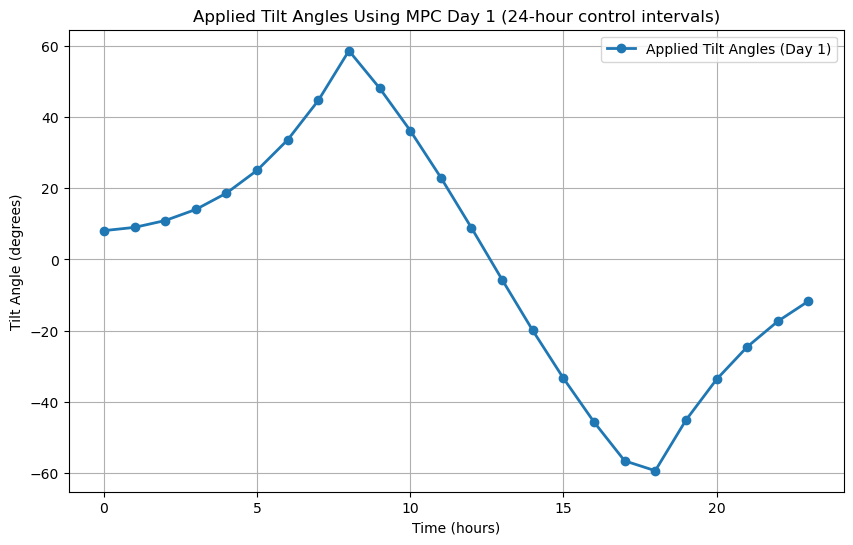

In [ ]:
# Plot the applied tilt angles
plt.figure(figsize=(10, 6))
plt.plot(applied_angles[:24], label="Applied Tilt Angles (Day 1)", lw=2, marker='o')
plt.xlabel("Time (hours)")
plt.ylabel("Tilt Angle (degrees)")
plt.title("Applied Tilt Angles Using MPC Day 1 (24-hour control intervals)")
plt.grid(True)
plt.legend()
plt.show()

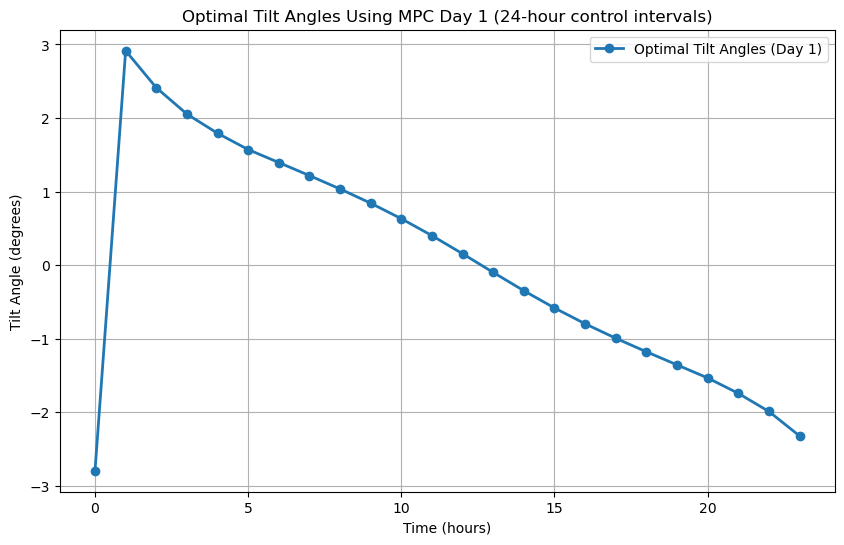

In [ ]:
# Plot the applied tilt angles
plt.figure(figsize=(10, 6))
plt.plot(optimal_angle[:24], label="Optimal Tilt Angles (Day 1)", lw=2, marker='o')
plt.xlabel("Time (hours)")
plt.ylabel("Tilt Angle (degrees)")
plt.title("Optimal Tilt Angles Using MPC Day 1 (24-hour control intervals)")
plt.grid(True)
plt.legend()
plt.show()

# END

In [ ]:
list(range(0, 145, 24))

[0, 24, 48, 72, 96, 120, 144]

# Stochastic MPC (SMPC)

In [ ]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

# Parameters
num_scenarios = 10  # Number of weather scenarios
DNI_std = 0.1 * DNI  # Assuming 10% standard deviation for DNI
DHI_std = 0.1 * DHI  # Assuming 10% standard deviation for DHI

# Generate stochastic DNI and DHI for each scenario
DNI_scenarios = np.random.normal(DNI, DNI_std, (num_scenarios, len(DNI)))
DHI_scenarios = np.random.normal(DHI, DHI_std, (num_scenarios, len(DHI)))

def mpc_control_stochastic(initial_theta, DNI_scenarios, DHI_scenarios, theta_e, optimal_angle, control_interval=7, N=14):
    control_interval = control_interval * 24
    N = N * 24
    applied_tilt_angles = []
    current_theta = initial_theta

    for t in range(0, N - control_interval + 1, 24):
        model = ConcreteModel()

        # Define tilt angle as a decision variable
        model.θ = Var(range(control_interval), bounds=(-60 / 180 * np.pi, 60 / 180 * np.pi), initialize=current_theta)

        # Define power generation expressions and DLI constraints for each scenario
        expected_cost = 0  # Initialize expected cost
        for s in range(num_scenarios):
            DNI_horizon = DNI_scenarios[s, t:t + control_interval]
            DHI_horizon = DHI_scenarios[s, t:t + control_interval]
            theta_e_horizon = theta_e[t:t + control_interval]
            optimal_angle_horizon = optimal_angle[t:t + control_interval]

            # Add power generation cost for scenario
            scenario_cost = sum(
                W_p * L_p * eta * (cos(model.θ[i]) * sin(theta_e_horizon[i]) +
                                   sin(model.θ[i]) * cos(theta_e_horizon[i]) * cos(alpha[i] - np.pi / 2)) * DNI_horizon[i] +
                DHI_horizon[i]
                for i in range(control_interval)
            ) / 1e6 * power_price

            expected_cost += scenario_cost / num_scenarios  # Average over scenarios

            # Define DLI constraint for each scenario
            model.add_component(f"DLI_constraint_scenario_{s}", Constraint(expr=sum(
                RS_p * (sin(theta_e_horizon[i]) * DNI_horizon[i] + DHI_horizon[i]) - model.θ[i] * DNI_horizon[i]
                for i in range(control_interval)
            ) >= DLI_target_min))

        model.objective = Objective(expr=expected_cost, sense=maximize)

        # Solve the optimization problem
        solver = SolverFactory('ipopt')
        solver.solve(model)

        # Apply the control action for each time step in the control interval
        applied_tilt_angles.extend([value(model.θ[i]) * 180 / np.pi for i in range(24)])

        # Update current tilt angle for the next interval
        current_theta = value(model.θ[control_interval - 1])

    return applied_tilt_angles

# Run the stochastic MPC control function
applied_angles = mpc_control_stochastic(0, DNI_scenarios, DHI_scenarios, theta_e, optimal_angle, control_interval=7, N=14)

# Plot the applied tilt angles
plt.figure(figsize=(10, 6))
plt.plot(range(len(applied_angles)), applied_angles, label="Applied Tilt Angles with Stochastic MPC", lw=2, marker='o')
plt.xlabel("Time (hours)")
plt.ylabel("Tilt Angle (degrees)")
plt.title("Applied Tilt Angles Using Stochastic MPC Over 8 Days")
plt.grid(True)
plt.legend()
plt.show()

IndexError: index 24 is out of bounds for axis 0 with size 24

# Generate Weather Scenarios:
i. Gaussian (Normal) Distribution Sampling

In [ ]:
import numpy as np

# Historical mean and standard deviation for DNI and DHI
DNI_mean = np.array([0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 0])  # Example mean values
DNI_std = 0.1 * DNI_mean  # Example standard deviation (10% of mean)

DHI_mean = np.array([0, 0, 0, 55, 131, 205, 154, 319, 433, 434, 265, 343, 314, 167, 234, 38])  # Example mean values
DHI_std = 0.1 * DHI_mean  # Example standard deviation

# Generate scenarios
num_scenarios = 10
DNI_scenarios = np.random.normal(DNI_mean, DNI_std, (num_scenarios, len(DNI_mean)))
DHI_scenarios = np.random.normal(DHI_mean, DHI_std, (num_scenarios, len(DHI_mean)))

ii. Bootstrap Sampling

In [ ]:
# Example historical hourly data for DNI and DHI over multiple days (e.g., 24 hours per day * 30 days)
historical_DNI = np.random.rand(720) * 800  # Placeholder data
historical_DHI = np.random.rand(720) * 500  # Placeholder data

# Generate scenarios by sampling from historical data
num_scenarios = 10
scenario_length = 24  # Assuming 24 hours
DNI_scenarios = np.array([np.random.choice(historical_DNI, scenario_length, replace=True) for _ in range(num_scenarios)])
DHI_scenarios = np.array([np.random.choice(historical_DHI, scenario_length, replace=True) for _ in range(num_scenarios)])

iii.  Latin Hypercube Sampling (LHS)

In [ ]:
from scipy.stats import norm, qmc

# Define the number of scenarios and the weather data properties
num_scenarios = 10
DNI_mean = 400  # Example mean DNI
DNI_std = 40    # Example standard deviation

# Initialize LHS sampler
sampler = qmc.LatinHypercube(d=1)
lhs_samples = sampler.random(num_scenarios)

# Scale LHS samples to the normal distribution for DNI
DNI_scenarios = norm.ppf(lhs_samples, loc=DNI_mean, scale=DNI_std).flatten()

111

In [ ]:
expected_cost = 0
for s in range(num_scenarios):
    scenario_cost = sum(
        W_p * L_p * eta * (cos(model.θ[i]) * sin(theta_e_horizon[i]) +
                           sin(model.θ[i]) * cos(theta_e_horizon[i]) * cos(alpha[i] - np.pi / 2)) * DNI_scenarios[s, i] +
        DHI_scenarios[s, i]
        for i in range(control_interval)
    ) / 1e6 * power_price

    expected_cost += scenario_cost / num_scenarios  # Averaging over scenarios

model.objective = Objective(expr=expected_cost, sense=maximize)

222 In this example, DLI_constraint_scenario_{s} ensures that each scenario meets the minimum DLI target.

In [ ]:
for s in range(num_scenarios):
    model.add_component(f"DLI_constraint_scenario_{s}", Constraint(
        expr=sum(
            RS_p * (sin(theta_e_horizon[i]) * DNI_scenarios[s, i] + DHI_scenarios[s, i]) - model.shadow_length[i] * DNI_scenarios[s, i]
            for i in range(control_interval)
        ) >= DLI_target_min
    ))

333 This way, you are only enforcing the DLI target constraint in an expected sense rather than for each scenario.

In [ ]:
DLI_expected_constraint = sum(
    sum(
        RS_p * (sin(theta_e_horizon[i]) * DNI_scenarios[s, i] + DHI_scenarios[s, i]) - model.shadow_length[i] * DNI_scenarios[s, i]
        for i in range(control_interval)
    ) / num_scenarios
    for s in range(num_scenarios)
) >= DLI_target_min

model.DLI_chance_constraint = Constraint(expr=DLI_expected_constraint)

apply chance constraint

In [ ]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Parameters
num_scenarios = 100  # Number of scenarios for weather uncertainty
probability_level = 0.9  # 90% chance constraint for DLI
DLI_target_min = 30.0  # Minimum target DLI

# Generate stochastic DNI and DHI data for each scenario
DNI_std = 0.1 * DNI  # Assuming 10% variability
DHI_std = 0.1 * DHI
DNI_scenarios = np.random.normal(DNI, DNI_std, (num_scenarios, len(DNI)))
DHI_scenarios = np.random.normal(DHI, DHI_std, (num_scenarios, len(DHI)))

# Initialize the Pyomo model
model = ConcreteModel()

# Define control variables (e.g., tilt angles over control interval)
control_interval = 24  # Assume a 24-hour control interval
model.θ = Var(range(control_interval), bounds=(-60 / 180 * np.pi, 60 / 180 * np.pi))

# Define constraint to enforce DLI target with 90% probability
DLI_constraints = []
for s in range(num_scenarios):
    # Calculate DLI for this scenario
    DLI_scenario = sum(
        RS_p * (np.sin(theta_e[i]) * DNI_scenarios[s, i] + DHI_scenarios[s, i]) - np.cos(model.θ[i] - optimal_angle[i]) * DNI_scenarios[s, i]
        for i in range(control_interval)
    )
    DLI_constraints.append(DLI_scenario)

# Sort scenarios by DLI constraint value
sorted_DLI_constraints = sorted(DLI_constraints)

# Apply chance constraint to the top 90% of sorted DLI constraints
threshold_index = int(probability_level * num_scenarios)
model.DLI_chance_constraint = Constraint(expr=sorted_DLI_constraints[threshold_index] >= DLI_target_min)

# Improvement suggestions

In [ ]:
! pip install pvlib

# 1. Data structure

In [ ]:
# import random

# # Define the number of days in the growing season ,array length
# num_days = 95

# # Function to generate a random day of solar radiation data based on typical hourly patterns
# def generate_day():
#     # Example base patterns for a typical summer day in New York (adjust as needed)
#     GHI_base = [0, 0, 0, 0, 0, 61, 160, 343, 599, 646, 633, 498, 278, 367, 337, 169, 342, 38, 16, 1, 0, 0, 0, 0]  # W/m²
#     DNI_base = [0, 0, 0, 0, 0, 36, 87, 271, 669, 412, 225, 68, 13, 26, 27, 2, 197, 33, 11, 0, 0, 0, 0]  # W/m²
#     DHI_base = [0, 0, 0, 0, 0, 55, 131, 205, 154, 319, 433, 434, 265, 343, 314, 167, 234, 38, 16, 1, 0, 0, 0, 0]  # W/m²

#     # Introduce randomness by scaling each value by a factor of 0.8 to 1.2
#     GHI_day = [round(ghi * (0.8 + 0.4 * random.random())) for ghi in GHI_base]
#     DNI_day = [round(dni * (0.8 + 0.4 * random.random())) for dni in DNI_base]
#     DHI_day = [round(dhi * (0.8 + 0.4 * random.random())) for dhi in DHI_base]

#     return GHI_day, DNI_day, DHI_day

# # Generate the data for the whole growing season
# GHI_season = []
# DNI_season = []
# DHI_season = []

# for day in range(num_days):
#     GHI_day, DNI_day, DHI_day = generate_day()
#     GHI_season.append(GHI_day)
#     DNI_season.append(DNI_day)
#     DHI_season.append(DHI_day)

# # Define a class to hold the current rolling 7-day data (similar to the SolarDay struct in Julia)
# class SolarDay:
#     def __init__(self, GHI, DNI, DHI):
#         self.GHI = GHI  # List of GHI values (hourly for a day)
#         self.DNI = DNI  # List of DNI values (hourly for a day)
#         self.DHI = DHI  # List of DHI values (hourly for a day)

# # Example usage: Store the data for a given day in a SolarDay object
# day_1_solar_data = SolarDay(GHI_season[0], DNI_season[0], DHI_season[0])

# # Print the solar data for the first day to check the structure
# print("GHI (Day 1):", day_1_solar_data.GHI)
# print("DNI (Day 1):", day_1_solar_data.DNI)
# print("DHI (Day 1):", day_1_solar_data.DHI)

GHI (Day 1): [0, 0, 0, 0, 0, 60, 172, 365, 684, 751, 660, 494, 321, 412, 359, 169, 408, 41, 17, 1, 0, 0, 0, 0]
DNI (Day 1): [0, 0, 0, 0, 0, 30, 99, 264, 548, 482, 235, 66, 13, 31, 31, 2, 224, 27, 9, 0, 0, 0, 0]
DHI (Day 1): [0, 0, 0, 0, 0, 53, 147, 223, 175, 320, 470, 398, 216, 398, 359, 191, 253, 36, 18, 1, 0, 0, 0, 0]


# 2. Linearize shade


Ra is the total radiation at point a.
L(θ) is the shadow length depending on the tilt angle θ.
Rdiffuse and Rdirect are the diffuse and direct solar radiation, respectively.
linearize the constraint based on binary variables y1 and y2.

In [ ]:
# import pulp as pl

# # Define the problem
# prob = pl.LpProblem("Shadow_Length_Linearization", pl.LpMinimize)

# # Define the variables
# x1 = pl.LpVariable('x1', lowBound=0)
# x2 = pl.LpVariable('x2', lowBound=0)
# y1 = pl.LpVariable('y1', cat='Binary')
# y2 = pl.LpVariable('y2', cat='Binary')
# Ra = pl.LpVariable('Ra', lowBound=0)
# Rdiffuse = 100  # Example value for diffuse radiation
# Rdirect = 200   # Example value for direct radiation
# L_theta = pl.LpVariable('L_theta', lowBound=0)  # Shadow length L(θ)
# a = 50          # Example value for parameter a
# U = 10**6       # Large number U

# # Objective function (for example purposes, we minimize Ra)
# prob += Ra

# # Constraints
# prob += Ra == Rdiffuse + Rdirect * y1 + Rdiffuse * y2, "Radiation"
# prob += y1 + y2 == 1, "Binary_Sum"
# prob += x1 + x2 == L_theta, "Shadow_Length_Sum"
# prob += x1 >= 0
# prob += x1 <= a * y1, "X1_Constraint"
# prob += x2 >= a * y2, "X2_Lower_Bound"
# prob += x2 <= U * y2, "X2_Upper_Bound"
# prob += L_theta >= 0

# # Solve the problem
# prob.solve()

# # Print the results
# print(f"Status: {pl.LpStatus[prob.status]}")
# print(f"x1 = {pl.value(x1)}")
# print(f"x2 = {pl.value(x2)}")
# print(f"y1 = {pl.value(y1)}")
# print(f"y2 = {pl.value(y2)}")
# print(f"Ra = {pl.value(Ra)}")
# print(f"L(θ) = {pl.value(L_theta)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/sf-design/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7j/cxldrkvj6zd73sg__4pds88w0000gn/T/b957a3cb98234dcaa3dd5ed7a597d07c-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/7j/cxldrkvj6zd73sg__4pds88w0000gn/T/b957a3cb98234dcaa3dd5ed7a597d07c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 35 RHS
At line 44 BOUNDS
At line 47 ENDATA
Problem MODEL has 8 rows, 6 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 200 - 0.00 seconds
Cgl0004I processed model has 2 rows, 2 columns (1 integer (1 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to 99.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 200
Cbc0038I Relaxing continuous give

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv("1101_7.csv")

# Calculate GHI, DHI, and DNI if columns exist
data['GHI'] = data['shortwave_radiation']  # Use directly if GHI is the total incoming radiation on a horizontal surface
data['DNI'] = data['direct_normal_irradiance']  # Directly using DNI column
data['DHI'] = data['diffuse_radiation']  # Directly using DHI column

# For instantaneous values (hourly or other intervals), you could aggregate as needed
data['GHI_instant'] = data['shortwave_radiation_instant']
data['DNI_instant'] = data['direct_normal_irradiance_instant']
data['DHI_instant'] = data['diffuse_radiation_instant']

# Example: Calculate daily totals if needed
daily_data = data.resample('D').sum()  # Ensure datetime index is set before resampling
print(daily_data[['GHI', 'DNI', 'DHI']])

Global Horizontal Irradiance (GHI):
GHI is the total amount of solar radiation received per unit area on a horizontal surface.
directly use shortwave_radiation (W/m²) (if it represents the incoming solar radiation on a horizontal surface, which usually corresponds to GHI.)


Direct Normal Irradiance (DNI):
DNI is the amount of solar radiation received per unit area by a surface that is always held perpendicular to the sun's rays.
use direct_normal_irradiance (W/m²) directly if it represents the perpendicular direct sunlight.

Diffuse Horizontal Irradiance (DHI):
DHI is the portion of solar radiation received from the sky, excluding direct sunlight.
use diffuse_radiation (W/m²) for DHI, as this usually represents the scattered component of sunlight.

alternatively
Using the Instantaneous Columns (If the data is recorded on a time series basis and you need to calculate hourly or daily averages), use:

shortwave_radiation_instant, direct_radiation_instant, and diffuse_radiation_instant for instantaneous GHI, DNI, and DHI values.
Sum or average these instantaneous values across a given time interval to get hourly or daily values if needed.

# 3. Power generation

In [ ]:
import pvlib
import pandas as pd
import numpy as np

# Define system and location parameters for Ithaca, NY
latitude = 42.4438  # Ithaca latitude
longitude = -76.5019  # Ithaca longitude
tz = 'America/New_York'  # Timezone

# Create a pvlib location object
location = pvlib.location.Location(latitude, longitude, tz=tz)

# Define the date range for simulation from June 21 to June 28 with hourly intervals
times = pd.date_range(start='2023-06-21', end='2023-06-28', freq='H', tz=tz)

# Use a clear-sky model to estimate irradiance data
clear_sky = location.get_clearsky(times)
dni = clear_sky['dni']
dhi = clear_sky['dhi']
ghi = clear_sky['ghi']

# Solar position data for the given times
solar_position = location.get_solarposition(times)

# Define system parameters for more detailed modeling
system = {
    'module_parameters': {
        'pdc0': 330,  # Rated DC power at standard test conditions (STC)
        'gamma_pdc': -0.004,  # Temperature coefficient of power (1/°C)
    },
    'inverter_parameters': {
        'pdc0': 330,  # Rated DC power input
        'eta_inv_nom': 0.96,  # Nominal inverter efficiency
    },
    'surface_tilt': 30,  # Optimal tilt for location
    'surface_azimuth': 180,  # South-facing
    'albedo': 0.2,  # Ground reflectance
}

# Environmental conditions (user-provided)
temperature_ambient = 25  # Ambient temperature in °C
wind_speed = 2  # Wind speed in m/s

# Calculate POA irradiance for each hour
poa_irradiance = pvlib.irradiance.get_total_irradiance(
    surface_tilt=system['surface_tilt'],
    surface_azimuth=system['surface_azimuth'],
    dni=dni,
    ghi=ghi,
    dhi=dhi,
    solar_zenith=solar_position['zenith'],
    solar_azimuth=solar_position['azimuth']
)

# Calculate cell temperature
temperature_model_params = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
cell_temperature = pvlib.temperature.sapm_cell(
    poa_irradiance['poa_global'],
    temperature_ambient,
    wind_speed,
    **temperature_model_params
)

# Calculate the adjusted DC power based on POA irradiance and temperature effects
dc_power = pvlib.pvsystem.pvwatts_dc(
    poa_irradiance['poa_global'],
    pdc0=system['module_parameters']['pdc0'],
    gamma_pdc=system['module_parameters']['gamma_pdc'],
    temp_cell=cell_temperature
)

# Convert to AC power with inverter efficiency
ac_power = dc_power * system['inverter_parameters']['eta_inv_nom']

# Sum the power output over the period
total_ac_power = ac_power.sum()
print(f"Total AC power output from June 21 to June 28 in Ithaca, NY: {total_ac_power} Wh")

Total AC power output from June 21 to June 28 in Ithaca, NY: 15372.51768527672 Wh


In [ ]:
import pvlib
import pandas as pd
import numpy as np

# Define system and location parameters for Ithaca, NY
latitude = 42.4438  # Ithaca latitude
longitude = -76.5019  # Ithaca longitude
tz = 'America/New_York'  # Timezone

# Create a pvlib location object
location = pvlib.location.Location(latitude, longitude, tz=tz)

# Define the date range for simulation from June 21 to June 28 with hourly intervals
times = pd.date_range(start='2023-06-21', end='2023-06-28', freq='H', tz=tz)

# Use a clear-sky model to estimate irradiance data
clear_sky = location.get_clearsky(times)
dni = clear_sky['dni']
dhi = clear_sky['dhi']
ghi = clear_sky['ghi']

# Solar position data for the given times
solar_position = location.get_solarposition(times)

# Define system parameters for more detailed modeling
system = {
    'module_parameters': {
        'pdc0': 330,  # Rated DC power at standard test conditions (STC)
        'gamma_pdc': -0.004,  # Temperature coefficient of power (1/°C)
    },
    'inverter_parameters': {
        'pdc0': 330,  # Rated DC power input
        'eta_inv_nom': 0.96,  # Nominal inverter efficiency
    },
    'surface_tilt': 30,  # Optimal tilt for location
    'surface_azimuth': 180,  # South-facing
    'albedo': 0.2,  # Ground reflectance
}

# Environmental conditions (user-provided)
temperature_ambient = 25  # Ambient temperature in °C
wind_speed = 2  # Wind speed in m/s

# Calculate POA irradiance for each hour
poa_irradiance = pvlib.irradiance.get_total_irradiance(
    surface_tilt=system['surface_tilt'],
    surface_azimuth=system['surface_azimuth'],
    dni=dni,
    ghi=ghi,
    dhi=dhi,
    solar_zenith=solar_position['zenith'],
    solar_azimuth=solar_position['azimuth']
)

# Calculate cell temperature
temperature_model_params = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
cell_temperature = pvlib.temperature.sapm_cell(
    poa_irradiance['poa_global'],
    temperature_ambient,
    wind_speed,
    **temperature_model_params
)

# Calculate the adjusted DC power based on POA irradiance and temperature effects
dc_power = pvlib.pvsystem.pvwatts_dc(
    poa_irradiance['poa_global'],
    pdc0=system['module_parameters']['pdc0'],
    gamma_pdc=system['module_parameters']['gamma_pdc'],
    temp_cell=cell_temperature
)

# Convert to AC power with inverter efficiency
ac_power = dc_power * system['inverter_parameters']['eta_inv_nom']

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Time': times,
    'DNI': dni,
    'DHI': dhi,
    'GHI': ghi,
    'POA_Irradiance': poa_irradiance['poa_global'],
    'Cell_Temperature': cell_temperature,
    'DC_Power': dc_power,
    'AC_Power': ac_power
})

# Print hourly results
print("Hourly AC Power Output (Wh):")
print(results_df[['Time', 'AC_Power']])

# Calculate and print daily totals
daily_totals = results_df.resample('D', on='Time')['AC_Power'].sum()
print("\nDaily Total AC Power Output (Wh):")
print(daily_totals)

Hourly AC Power Output (Wh):
                                               Time  AC_Power
2023-06-21 00:00:00-04:00 2023-06-21 00:00:00-04:00  0.000000
2023-06-21 01:00:00-04:00 2023-06-21 01:00:00-04:00  0.000000
2023-06-21 02:00:00-04:00 2023-06-21 02:00:00-04:00  0.000000
2023-06-21 03:00:00-04:00 2023-06-21 03:00:00-04:00  0.000000
2023-06-21 04:00:00-04:00 2023-06-21 04:00:00-04:00  0.000000
...                                             ...       ...
2023-06-27 20:00:00-04:00 2023-06-27 20:00:00-04:00  7.637585
2023-06-27 21:00:00-04:00 2023-06-27 21:00:00-04:00  0.000000
2023-06-27 22:00:00-04:00 2023-06-27 22:00:00-04:00  0.000000
2023-06-27 23:00:00-04:00 2023-06-27 23:00:00-04:00  0.000000
2023-06-28 00:00:00-04:00 2023-06-28 00:00:00-04:00  0.000000

[169 rows x 2 columns]

Daily Total AC Power Output (Wh):
Time
2023-06-21 00:00:00-04:00    2198.267004
2023-06-22 00:00:00-04:00    2197.624980
2023-06-23 00:00:00-04:00    2196.929562
2023-06-24 00:00:00-04:00    2196.180787

In [ ]:
import pvlib
import numpy as np

# Constants for the PV system (example values; adjust as needed)
pdc0 = 330  # Rated DC power in watts
gamma_pdc = -0.004  # Temperature coefficient for DC power (1/°C)
eta_inv_nom = 0.96  # Nominal inverter efficiency (96%)

# Define module temperature model parameters (open-rack model, typical setup)
temperature_model_params = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# Power generation expression with detailed calculations
def power_generation_expr(model, i):
    # Calculate POA irradiance using tilt and azimuth angles, DNI, DHI, and AOI
    poa_irradiance = model.aoi[i] * DNI_horizon[i] + DHI_horizon[i]

    # Calculate cell temperature (adjust for actual ambient temperature and wind speed data if available)
    cell_temperature = pvlib.temperature.sapm_cell(
        poa_irradiance,
        temperature_ambient[i],  # Ambient temperature for the given interval
        wind_speed[i],  # Wind speed for the given interval
        **temperature_model_params
    )

    # Adjust the DC power using pvwatts_dc() model with temperature effects
    dc_power = pvlib.pvsystem.pvwatts_dc(
        poa_irradiance,
        pdc0=pdc0,
        gamma_pdc=gamma_pdc,
        temp_cell=cell_temperature
    )

    # Convert to AC power by applying inverter efficiency
    ac_power = dc_power * eta_inv_nom

    return W_p * L_p * ac_power  # Scale by panel area, if needed

model.power_generation = Expression(range(control_interval), rule=power_generation_expr)

In [ ]:
!pip install meteostat

In [ ]:
from meteostat import Point, Hourly
import pandas as pd
from datetime import datetime

# Define location (e.g., Ithaca, NY)
location = Point(42.4438, -76.5019)

# Define date range as datetime objects
start_date = datetime(2023, 6, 21)
end_date = datetime(2023, 6, 28)

# Retrieve hourly weather data
data = Hourly(location, start_date, end_date)
data = data.fetch()

# Extract temperature and wind speed
temperature_ambient = data['temp']  # Ambient temperature in °C
wind_speed = data['wspd']  # Wind speed in m/s

print(temperature_ambient.head())  # Preview temperature data
print(wind_speed.head())  # Preview wind speed data

time
2023-06-21 00:00:00    21.7
2023-06-21 01:00:00    18.9
2023-06-21 02:00:00    18.9
2023-06-21 03:00:00    18.3
2023-06-21 04:00:00    18.3
Freq: H, Name: temp, dtype: float64
time
2023-06-21 00:00:00    7.6
2023-06-21 01:00:00    7.6
2023-06-21 02:00:00    7.6
2023-06-21 03:00:00    7.6
2023-06-21 04:00:00    7.6
Freq: H, Name: wspd, dtype: float64


In [ ]:
from meteostat import Point, Hourly
import pandas as pd
from datetime import datetime

# Define location (e.g., Ithaca, NY)
location = Point(42.4438, -76.5019)

# Define date range as datetime objects
start_date = datetime(2023, 6, 21)
end_date = datetime(2023, 6, 28)

# Retrieve hourly weather data
data = Hourly(location, start_date, end_date)
data = data.fetch()

# Extract temperature and wind speed and save to CSV
data[['temp', 'wspd']].to_csv('temperature_wind_data.csv', index=True)

print("Data has been saved to 'temperature_wind_data.csv'")

Data has been saved to 'temperature_wind_data.csv'
